<a href="https://colab.research.google.com/github/Siddarth45/Cricket_Analytics/blob/main/Player_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

# remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture("/content/front_angle_sample.avi")



In [ ]:
# Read the input video
cap = cv2.VideoCapture('front_angle_sample.avi')

# find the fps
fps = cap.get(cv2.CAP_PROP_FPS)
print("FPS of the video:", fps)

FPS of the video: 45.833


In [ ]:
# Initialize a frame count variable
frame_count = 0

# Read each frame of the video
while (True) & (frame_count < 1000):
    ret, frame = capture.read()

    # If the frame was not read successfully, break the loop
    if not ret:
        break

    # Convert the frame to grayscale
    #     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Save the grayscale frame as an image file
    cv2.imwrite("front_frame_{:04d}.jpg".format(frame_count), frame)

    # Increment the frame count
    frame_count += 1

capture.release()

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = 'front_frame_0146.jpg'
full = cv2.imread(file_name)
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

Saving front_frame_0146.jpg to front_frame_0146 (1).jpg


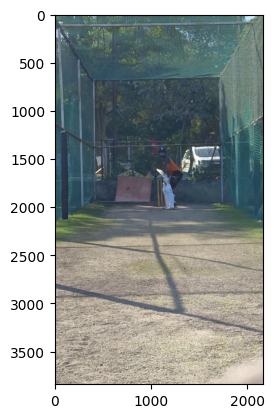

In [ ]:
plt.imshow(full)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = 'front_frame_0123.jpg'
s1 = cv2.imread('front_frame_0123.jpg')
s1 = cv2.cvtColor(s1, cv2.COLOR_BGR2RGB)

Saving front_frame_0123.jpg to front_frame_0123 (1).jpg


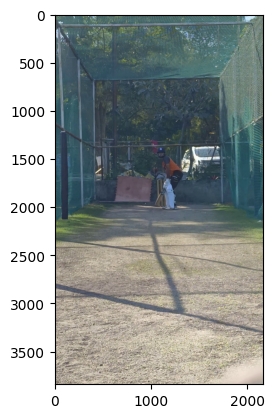

In [ ]:
plt.imshow(s1)
plt.show()

In [ ]:
s1.shape

(3840, 2160, 3)

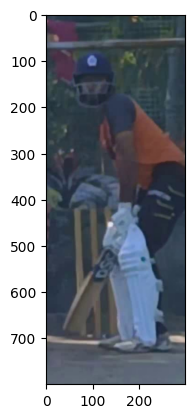

In [ ]:
# Define the region of interest
x, y, w, h = 1000, 1300, 300, 800
roi = s1[y:y+h, x:x+w]

# Show the cropped image
plt.imshow(roi)

In [ ]:
face = roi.copy()

In [ ]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [ ]:
height, width,channels = face.shape

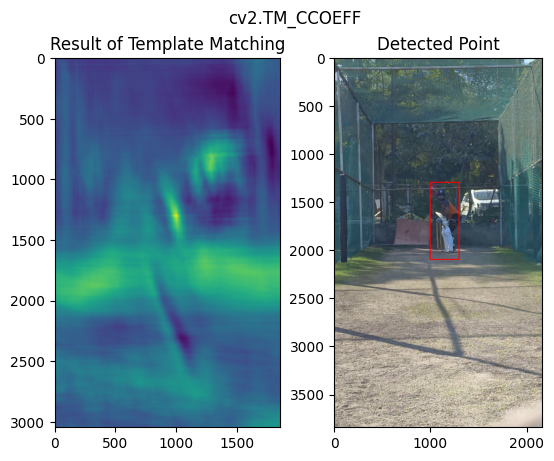

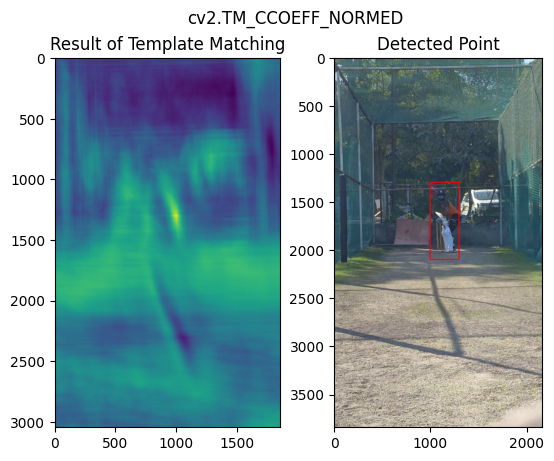

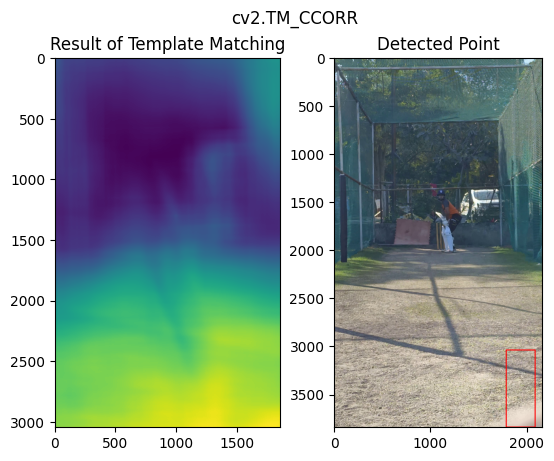

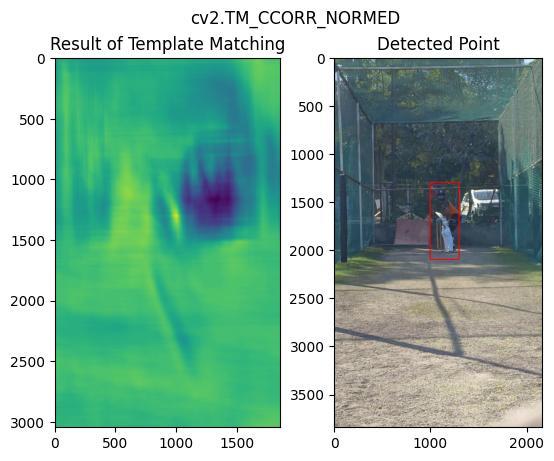

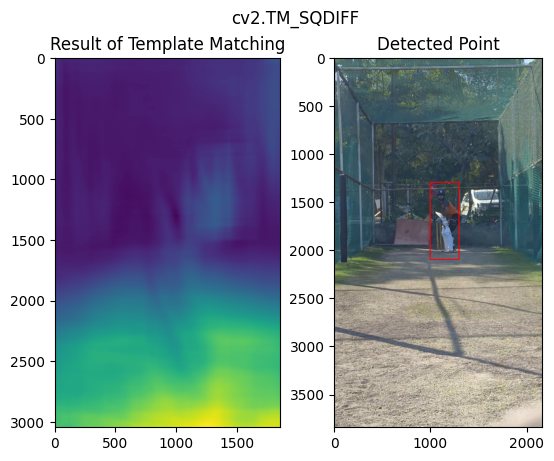

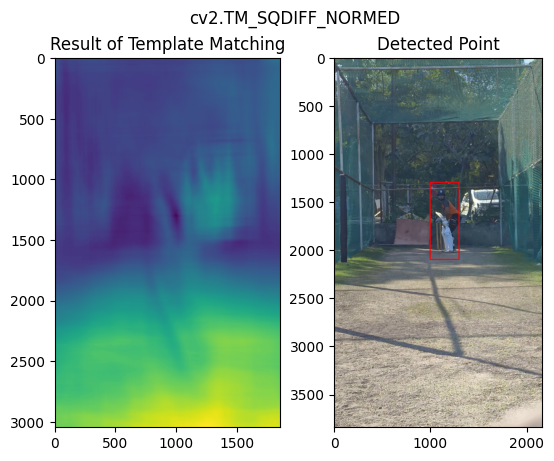

In [ ]:
for m in methods:

    # create a copy
    full_copy = full.copy()
    method = eval(m)

    # template matching
    res = cv2.matchTemplate(full_copy, face, method)

    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)


    plt.show()
    print('\n')

In [ ]:
random.seed(10)

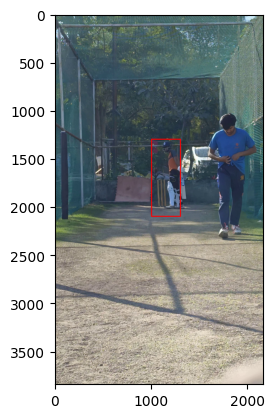

In [ ]:
r = random.randint(0,1000)
r_str = "{:0>{}}".format(r, 4)

full = cv2.imread(f'front_frame_{r_str}.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

m = 'cv2.TM_SQDIFF_NORMED'

# create a copy
full_copy = full.copy()
method = eval(m)

# template matching
res = cv2.matchTemplate(full_copy, face, method)

# Grab the Max and Min values, plus their locations
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

 # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
# Notice the coloring on the last 2 left hand side images.
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc

# Assign the Bottom Right of the rectangle
bottom_right = (top_left[0] + width, top_left[1] + height)

# Draw the Red Rectangle
cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)


# show input
plt.imshow(full)
plt.imshow(full_copy)
plt.show()

In [ ]:
frame_count = 0

start_frame = 0
n_frames = 900

max_val_dict = {}

for i in range(start_frame, start_frame + n_frames):
#     r = random.randint(0,1000)
    r_str = "{:0>{}}".format(i, 4)
    from google.colab import files
    full = cv2.imread(f'front_frame_{r_str}.jpg')
    full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

    m = 'cv2.TM_SQDIFF_NORMED'

    # create a copy
    full_copy = full.copy()
    method = eval(m)

    # template matching
    res = cv2.matchTemplate(full_copy, face, method)

    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # save max_val to dict
    max_val_dict[f'front_frame_{r_str}'] = max_val

     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Save the output frame as an image file
    full_copy = cv2.cvtColor(full_copy, cv2.COLOR_BGR2RGB)
    cv2.imwrite("a1_m1_front_frame_{:04d}.jpg".format(frame_count), full_copy)

    frame_count += 1


#     # show input
#     plt.imshow(full)
#     plt.imshow(full_copy)
#     plt.show()

In [ ]:
# Create DataFrame from dictionary
df = pd.DataFrame([(k, v) for k, v in max_val_dict.items()], columns=['Key', 'Value'])

In [ ]:
# df.head(300)

In [ ]:
df.columns = ['front_frame', 'a1_m1']

In [ ]:
df.to_csv('a1_m1_front_max_vals.csv', index = False)

In [ ]:
# Create a VideoWriter object
h, w, c = s1.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('a1_m1_front_output.avi', fourcc, fps, (w, h))

frame_count = 0

# Loop through the frames
for i in range(start_frame, start_frame + n_frames):
    r_str = "{:0>{}}".format(i, 4)

    # Load the frame
    filename = "a1_m1_front_frame_{:04d}.jpg".format(frame_count)
    frame = cv2.imread(filename)

    # Write the frame to the output video
    out.write(frame)

    frame_count += 1

# Release the VideoWriter object
out.release()